# Hypothesis Testing: Installs vs Rating

## Hypothesis:

__Null Hypothesis (Ho): There is no significant difference between the number of installs an App has and its rating.__

__Alternative Hypothesis (Ha): There is a significant difference between the number of installs an App has and its rating.__

## Imports

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from datetime import datetime, date
import scipy.stats as stats
import math
import nbimporter
from Helper_Functions import *

%matplotlib inline
sns.set(style = 'darkgrid')

In [71]:
play_store_data = pd.read_csv('../Data/Cleaned_Play_Store_Data.csv')
# Dropping Unnamed Columns
play_store_data.drop(play_store_data.columns[
    play_store_data.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

## Creating Data Frames to Match Hypothesis Testing

In [72]:
# I want to compare Install ranges that are comparible in size
# Thus, I create a groupby that returns the Install ranges with their respective counts
downloads_100_rating = play_store_data[play_store_data['Installs'] == 100]
downloads_500_rating = play_store_data[play_store_data['Installs'] == 500]
downloads_1000_rating = play_store_data[play_store_data['Installs'] == 1000]
downloads_5000_rating = play_store_data[play_store_data['Installs'] == 5000]
downloads_10000_rating = play_store_data[play_store_data['Installs'] == 10000]
downloads_50000_rating = play_store_data[play_store_data['Installs'] == 50000]
downloads_100000_rating = play_store_data[play_store_data['Installs'] == 100000]
downloads_500000_rating = play_store_data[play_store_data['Installs'] == 500000]
downloads_1000000_rating = play_store_data[play_store_data['Installs'] == 1000000]

In [73]:
downloads_1000_rating.Rating = downloads_1000_rating.Rating.round(2)
downloads_10000_rating.Rating = downloads_10000_rating.Rating.round(2)
downloads_5000_rating.Rating = downloads_5000_rating.Rating.round(2)
downloads_50000_rating.Rating = downloads_50000_rating.Rating.round(2)
downloads_100000_rating.Rating = downloads_100000_rating.Rating.round(2)
downloads_500_rating.Rating = downloads_500_rating.Rating.round(2)

/Users/zacharyvillarreal/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [74]:
# Group Data Frames by Install Level
downloads_1000_rating_dists = downloads_1000_rating.groupby('Rating').count().reset_index()
downloads_1000_rating_dists.App_Name = downloads_1000_rating_dists['App_Name'] / sum(
    downloads_1000_rating_dists['App_Name'])
downloads_1000_rating_dists = downloads_1000_rating_dists[['Rating','App_Name']]

downloads_10000_rating_dists = downloads_10000_rating.groupby('Rating').count().reset_index()
downloads_10000_rating_dists.App_Name = downloads_10000_rating_dists['App_Name'] / sum(
    downloads_10000_rating_dists['App_Name'])
downloads_10000_rating_dists = downloads_10000_rating_dists[['Rating','App_Name']]

downloads_5000_rating_dists = downloads_5000_rating.groupby('Rating').count().reset_index()
downloads_5000_rating_dists.App_Name = downloads_5000_rating_dists['App_Name'] / sum(
    downloads_5000_rating_dists['App_Name'])
downloads_5000_rating_dists = downloads_5000_rating_dists[['Rating','App_Name']]

downloads_50000_rating_dists = downloads_50000_rating.groupby('Rating').count().reset_index()
downloads_50000_rating_dists.App_Name = downloads_50000_rating_dists['App_Name'] / sum(
    downloads_50000_rating_dists['App_Name'])
downloads_50000_rating_dists = downloads_50000_rating_dists[['Rating','App_Name']]

downloads_100000_rating_dists = downloads_100000_rating.groupby('Rating').count().reset_index()
downloads_100000_rating_dists.App_Name = downloads_100000_rating_dists['App_Name'] / sum(
    downloads_100000_rating_dists['App_Name'])
downloads_100000_rating_dists = downloads_100000_rating_dists[['Rating','App_Name']]

downloads_500_rating_dists = downloads_500_rating.groupby('Rating').count().reset_index()
downloads_500_rating_dists.App_Name = downloads_500_rating_dists['App_Name'] / sum(
    downloads_500_rating_dists['App_Name'])
downloads_500_rating_dists = downloads_500_rating_dists[['Rating','App_Name']]

In [75]:
# Merging DataFrames to be able to compute h-test across equal array length
total_df = pd.merge(left = downloads_1000_rating_dists, right = downloads_10000_rating_dists, on = 'Rating', how='outer')
total_df = pd.merge(left = total_df, right = downloads_5000_rating_dists, on = 'Rating', how='outer')
total_df = pd.merge(left = total_df, right = downloads_50000_rating_dists, on ='Rating', how = 'outer')
total_df = pd.merge(left = total_df, right = downloads_100000_rating_dists, on ='Rating', how = 'outer')
total_df = pd.merge(left = total_df, right = downloads_500_rating_dists, on ='Rating', how = 'outer')

In [76]:
total_df.sort_values('Rating', inplace=True)
total_df.fillna(0, inplace=True)
total_df.columns = ['Rating', 'thousand', 'ten_thousand',
                    'five_thousand', 'fifty_thousand', 'hundred_thousand', 'five_hundred']

In [77]:
stats.kruskal(total_df.thousand, total_df.ten_thousand, total_df.five_thousand,
              total_df.fifty_thousand, total_df.hundred_thousand, total_df.five_hundred)

KruskalResult(statistic=48.10910940763658, pvalue=3.374345816415529e-09)

### Kruskal-Wallis H-Test Graph

In [78]:
# I want to compare Install ranges that are comparible in size
# Thus, I create a groupby that returns the Install ranges with their respective counts
downloads_100_rating = play_store_data[play_store_data['Installs'] == 100]
downloads_500_rating = play_store_data[play_store_data['Installs'] == 500]
downloads_1000_rating = play_store_data[play_store_data['Installs'] == 1000]
downloads_5000_rating = play_store_data[play_store_data['Installs'] == 5000]
downloads_10000_rating = play_store_data[play_store_data['Installs'] == 10000]
downloads_50000_rating = play_store_data[play_store_data['Installs'] == 50000]
downloads_100000_rating = play_store_data[play_store_data['Installs'] == 100000]
downloads_500000_rating = play_store_data[play_store_data['Installs'] == 500000]
downloads_1000000_rating = play_store_data[play_store_data['Installs'] == 1000000]

downloads_1000_rating.Rating = downloads_1000_rating.Rating.round(1)
downloads_10000_rating.Rating = downloads_10000_rating.Rating.round(1)
downloads_5000_rating.Rating = downloads_5000_rating.Rating.round(1)
downloads_50000_rating.Rating = downloads_50000_rating.Rating.round(1)
downloads_100000_rating.Rating = downloads_100000_rating.Rating.round(1)
downloads_500_rating.Rating = downloads_500_rating.Rating.round(1)

In [79]:
# Group Data Frames by Install Level
downloads_1000_rating_dists = downloads_1000_rating.groupby('Rating').count().reset_index()
downloads_1000_rating_dists.App_Name = downloads_1000_rating_dists['App_Name'] / sum(
    downloads_1000_rating_dists['App_Name'])
downloads_1000_rating_dists = downloads_1000_rating_dists[['Rating','App_Name']]

downloads_10000_rating_dists = downloads_10000_rating.groupby('Rating').count().reset_index()
downloads_10000_rating_dists.App_Name = downloads_10000_rating_dists['App_Name'] / sum(
    downloads_10000_rating_dists['App_Name'])
downloads_10000_rating_dists = downloads_10000_rating_dists[['Rating','App_Name']]

downloads_5000_rating_dists = downloads_5000_rating.groupby('Rating').count().reset_index()
downloads_5000_rating_dists.App_Name = downloads_5000_rating_dists['App_Name'] / sum(
    downloads_5000_rating_dists['App_Name'])
downloads_5000_rating_dists = downloads_5000_rating_dists[['Rating','App_Name']]

downloads_50000_rating_dists = downloads_50000_rating.groupby('Rating').count().reset_index()
downloads_50000_rating_dists.App_Name = downloads_50000_rating_dists['App_Name'] / sum(
    downloads_50000_rating_dists['App_Name'])
downloads_50000_rating_dists = downloads_50000_rating_dists[['Rating','App_Name']]

downloads_100000_rating_dists = downloads_100000_rating.groupby('Rating').count().reset_index()
downloads_100000_rating_dists.App_Name = downloads_100000_rating_dists['App_Name'] / sum(
    downloads_100000_rating_dists['App_Name'])
downloads_100000_rating_dists = downloads_100000_rating_dists[['Rating','App_Name']]

downloads_500_rating_dists = downloads_500_rating.groupby('Rating').count().reset_index()
downloads_500_rating_dists.App_Name = downloads_500_rating_dists['App_Name'] / sum(
    downloads_500_rating_dists['App_Name'])
downloads_500_rating_dists = downloads_500_rating_dists[['Rating','App_Name']]

In [80]:
# Merging DataFrames to be able to compute h-test across equal array length
total_df = pd.merge(left = downloads_1000_rating_dists, right = downloads_10000_rating_dists, on = 'Rating', how='outer')
total_df = pd.merge(left = total_df, right = downloads_5000_rating_dists, on = 'Rating', how='outer')
total_df = pd.merge(left = total_df, right = downloads_50000_rating_dists, on ='Rating', how = 'outer')
total_df = pd.merge(left = total_df, right = downloads_100000_rating_dists, on ='Rating', how = 'outer')
total_df = pd.merge(left = total_df, right = downloads_500_rating_dists, on ='Rating', how = 'outer')


total_df.sort_values('Rating', inplace=True)
total_df.fillna(0, inplace=True)
total_df.columns = ['Rating', 'thousand', 'ten_thousand',
                    'five_thousand', 'fifty_thousand', 'hundred_thousand', 'five_hundred']


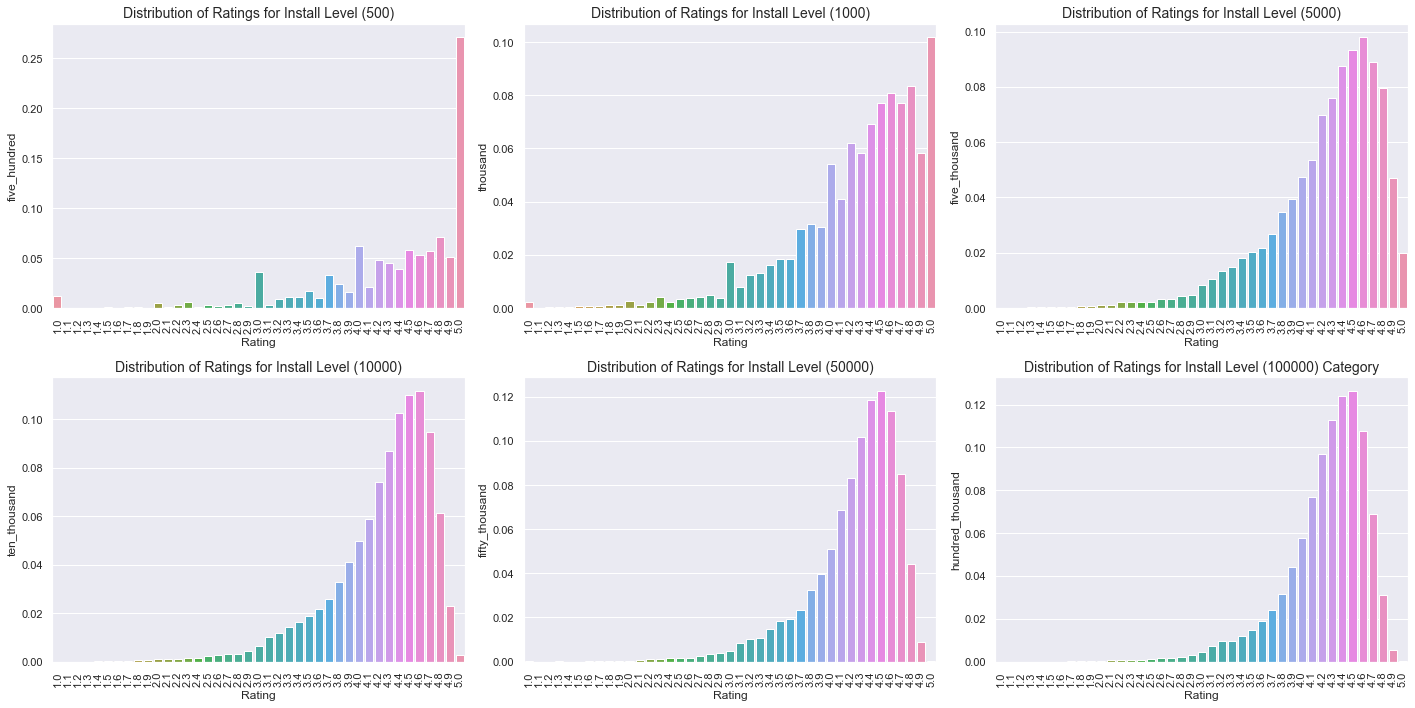

In [83]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# GAME Category
axs[0, 0].set_ylabel('Count of Ratings')
axs[0, 0].set_title('Distribution of Ratings for Install Level (500)', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.five_hundred, ax = axs[0,0])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# VIDEO PLAYERS Category
axs[0, 1].set_ylabel('Count of Ratings')
axs[0, 1].set_title(
    'Distribution of Ratings for Install Level (1000)', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.thousand, ax = axs[0,1])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# COMMUNICATION Category
axs[0, 2].set_ylabel('Count of Ratings')
axs[0, 2].set_title(
    'Distribution of Ratings for Install Level (5000)', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.five_thousand, ax = axs[0,2])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# PHOTOGRAPHY Category
axs[1, 0].set_ylabel('Count of Ratings')
axs[1, 0].set_title(
    'Distribution of Ratings for Install Level (10000)', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.ten_thousand, ax = axs[1,0])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# SOCIAL Category
axs[1, 1].set_ylabel('Count of Ratings')
axs[1, 1].set_title('Distribution of Ratings for Install Level (50000)', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.fifty_thousand, ax = axs[1,1])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# TOOLS Category
axs[1, 2].set_ylabel('Count of Ratings')
axs[1, 2].set_title('Distribution of Ratings for Install Level (100000) Category', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.hundred_thousand, ax = axs[1,2])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

plt.tight_layout()
# plt.savefig('../graphs/Distribution_of_Ratings_Over_Install_Level.png', dpi = 500, bbox_inches = 'tight');

## Post-Hoc Analysis

In [21]:
# I want to compare Install ranges that are comparible in size
# Thus, I create a groupby that returns the Install ranges with their respective counts
downloads_100 = play_store_data[play_store_data['Installs'] == 100]
downloads_500 = play_store_data[play_store_data['Installs'] == 500]
downloads_1000 = play_store_data[play_store_data['Installs'] == 1000]
downloads_5000 = play_store_data[play_store_data['Installs'] == 5000]
downloads_10000 = play_store_data[play_store_data['Installs'] == 10000]
downloads_50000 = play_store_data[play_store_data['Installs'] == 50000]
downloads_100000 = play_store_data[play_store_data['Installs'] == 100000]
downloads_500000 = play_store_data[play_store_data['Installs'] == 500000]
downloads_1000000 = play_store_data[play_store_data['Installs'] == 1000000]

In [22]:
# Calculating percentage of each review per level of install
percentage_list_1000 = []
for i in downloads_1000.Rating.value_counts().sort_values():
    percentage_list_1000.append(i/ downloads_1000.shape[0])
    
percentage_list_10000 = []
for i in downloads_10000.Rating.value_counts().sort_values():
    percentage_list_10000.append(i/ downloads_10000.shape[0])


# Initializing a dataframe that is used for depicting percentage of ratings per level of installs (1000, 10000)
df = pd.DataFrame({'rating': [1.0, 2.0, 3.0, 4.0, 5.0],
                   'installs_10000': [0.0, 0.1, 0.08, 0.56, 0.35],
                   'installs_1000': [0.0, 0.02, 0.09, 0.46, 0.43]},
                   columns = ["rating","installs_1000", 'installs_10000'])
df1 = df.melt('rating', var_name = 'a', value_name = 'b')

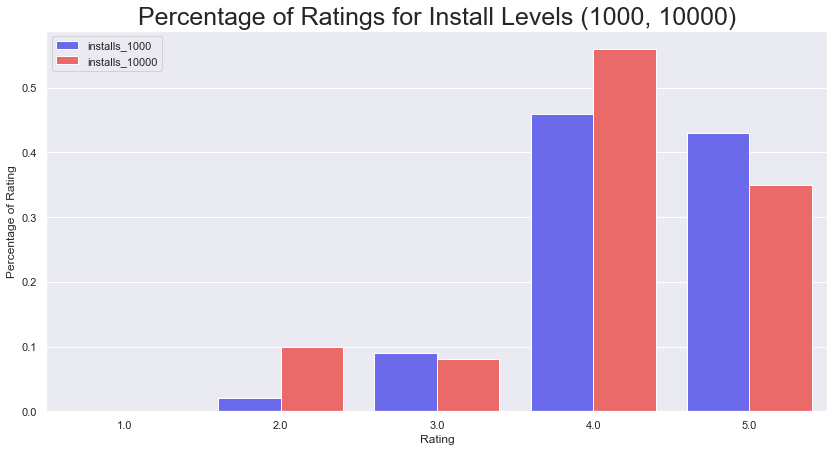

In [23]:
# Comparing Install Sizes of 1000 & 10000, to compare percentage of ratings
fig, ax = plt.subplots(figsize = (14,7))
sns.barplot(x = 'rating', y = 'b', hue = 'a', data = df1, palette='seismic')
plt.title('Percentage of Ratings for Install Levels (1000, 10000)', fontsize = 25)
plt.ylabel('Percentage of Rating')
plt.xlabel('Rating')
plt.legend(loc='upper left')
plt.savefig('../graphs/Percentage_of_Ratings_1k_10k.png', dpi = 500, bbox_inches = 'tight');

In [24]:
downloads_100.Rating = downloads_100.Rating.round(0)
# Calculating percentage of each review per level of install
percentage_list_100 = []
for i in downloads_100.Rating.value_counts().sort_values():
    percentage_list_100.append(i/ downloads_100.shape[0])
percentage_list_100


# Initializing a dataframe that is used for depicting percentage of ratings per level of installs (1000, 10000)
df = pd.DataFrame({'rating': [1.0, 2.0, 3.0, 4.0, 5.0],
                   'installs_10000': [0.0, 0.1, 0.08, 0.56, 0.35],
                   'installs_100': [0.03, 0.03, 0.07, 0.26, 0.61]},
                   columns = ["rating","installs_100", 'installs_10000'])
df1 = df.melt('rating', var_name = 'a', value_name = 'b')

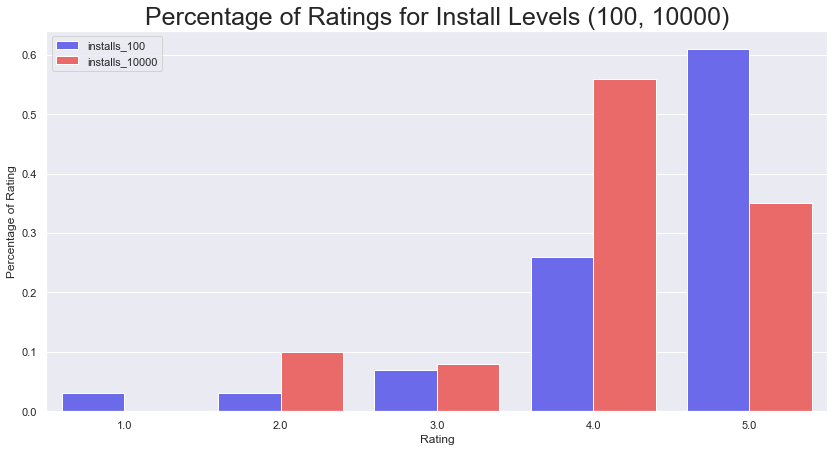

In [25]:
# Comparing Install Sizes of 1000 & 10000, to compare percentage of ratings
fig, ax = plt.subplots(figsize = (14,7))
sns.barplot(x = 'rating', y = 'b', hue = 'a', data = df1, palette='seismic')
plt.title('Percentage of Ratings for Install Levels (100, 10000)', fontsize = 25)
plt.ylabel('Percentage of Rating')
plt.xlabel('Rating')
plt.legend();
# plt.savefig('../graphs/Percentage_of_Ratings_100_10k.png', dpi = 500, bbox_inches = 'tight');

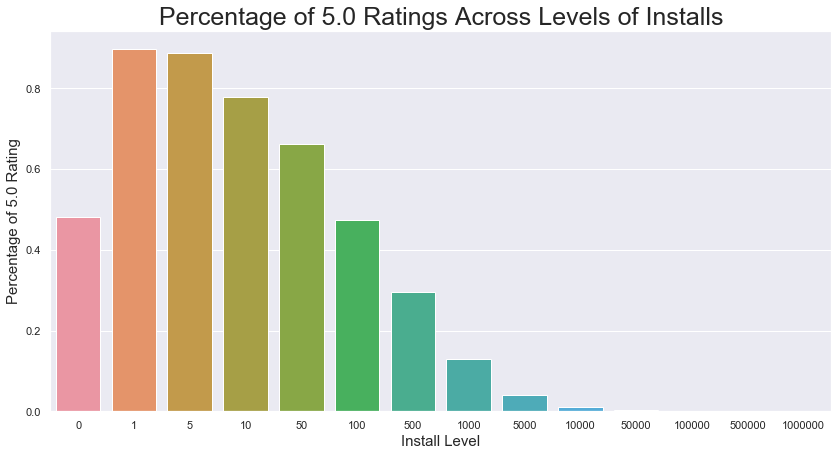

In [26]:
rating_5 = play_store_data[play_store_data['Rating'] >= 4.9]
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x=[0, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000,
               500000, 1000000], y=[(25/52), (393/438), (583/657), (3383/4351), 
                                    (2504/3777), (8550/18062), (4000/13528), 
                                    (6157/47233), (1014/25304), (582/57630), (51/21414),
                                    (53/34665), (10/8856), (5/11099)])
plt.title('Percentage of 5.0 Ratings Across Levels of Installs', fontsize = 25)
plt.xlabel('Install Level',fontsize = 15)
plt.ylabel('Percentage of 5.0 Rating', fontsize = 15);
# plt.savefig('../graphs/Percentage_of_5_Rating_Across_Installs.png', dpi = 500, bbox_inches = 'tight')

## Second Hypothesis Testing: Kruskal-Wallis H Test

In [90]:
# Group Data Frames by Category Type
game_rating = play_store_data[play_store_data['Category'] == 'GAME']
video_players_rating = play_store_data[play_store_data['Category'] == 'VIDEO_PLAYERS']
communication_rating = play_store_data[play_store_data['Category'] == 'COMMUNICATION']
photography_rating = play_store_data[play_store_data['Category'] == 'PHOTOGRAPHY']
social_rating = play_store_data[play_store_data['Category'] == 'SOCIAL']
tools_rating = play_store_data[play_store_data['Category'] == 'TOOLS']

In [91]:
# Group Data Frames by Category Type
game_rating.Rating = game_rating.Rating.round(2)
video_players_rating.Rating = video_players_rating.Rating.round(2)
communication_rating.Rating = communication_rating.Rating.round(2)
photography_rating.Rating = photography_rating.Rating.round(2)
social_rating.Rating = social_rating.Rating.round(2)
tools_rating.Rating = tools_rating.Rating.round(2)

game_rating_dists = game_rating.groupby('Rating').count().reset_index()
game_rating_dists.App_Name = game_rating_dists['App_Name'] / sum(
    game_rating_dists['App_Name'])
game_rating_dists = game_rating_dists[['Rating','App_Name']]

video_players_rating_dists = video_players_rating.groupby('Rating').count().reset_index()
video_players_rating_dists.App_Name = video_players_rating_dists['App_Name'] / sum(
    video_players_rating_dists['App_Name'])
video_players_rating_dists = video_players_rating_dists[['Rating','App_Name']]

communication_rating_dists = communication_rating.groupby('Rating').count().reset_index()
communication_rating_dists.App_Name = communication_rating_dists['App_Name'] / sum(
    communication_rating_dists['App_Name'])
communication_rating_dists = communication_rating_dists[['Rating','App_Name']]

photography_rating_dists = photography_rating.groupby('Rating').count().reset_index()
photography_rating_dists.App_Name = photography_rating_dists['App_Name'] / sum(
    photography_rating_dists['App_Name'])
photography_rating_dists = photography_rating_dists[['Rating','App_Name']]

social_rating_dists = social_rating.groupby('Rating').count().reset_index()
social_rating_dists.App_Name = social_rating_dists['App_Name'] / sum(
    social_rating_dists['App_Name'])
social_rating_dists = social_rating_dists[['Rating','App_Name']]

tools_rating_dists = tools_rating.groupby('Rating').count().reset_index()
tools_rating_dists.App_Name = tools_rating_dists['App_Name'] / sum(
    tools_rating_dists['App_Name'])
tools_rating_dists = tools_rating_dists[['Rating','App_Name']]

In [92]:
# Merging DataFrames to be able to compute h-test across equal array length
total_df = pd.merge(left = game_rating_dists, right = video_players_rating_dists, on = 'Rating', how='outer')
total_df = pd.merge(left = total_df, right = communication_rating_dists, on = 'Rating', how='outer')
total_df = pd.merge(left = total_df, right = photography_rating_dists, on ='Rating', how = 'outer')
total_df = pd.merge(left = total_df, right = social_rating_dists, on ='Rating', how = 'outer')
total_df = pd.merge(left = total_df, right = tools_rating_dists, on ='Rating', how = 'outer')

In [93]:
total_df.sort_values('Rating', inplace=True)
total_df.fillna(0, inplace = True)
total_df.columns = ['Rating', 'GAME', 'VIDEO_PLAYERS', 'COMMUNICATION', 'PHOTOGRAPHY', 'SOCIAL', 'TOOLS']

In [94]:
stats.kruskal(total_df.GAME, total_df.VIDEO_PLAYERS, total_df.COMMUNICATION,
              total_df.PHOTOGRAPHY, total_df.SOCIAL, total_df.TOOLS)

KruskalResult(statistic=14.985127476046463, pvalue=0.010426075281058229)

### Kruskal-Wallis H-Test Graph

In [95]:
# Group Data Frames by Category Type
game_rating = play_store_data[play_store_data['Category'] == 'GAME']
video_players_rating = play_store_data[play_store_data['Category'] == 'VIDEO_PLAYERS']
communication_rating = play_store_data[play_store_data['Category'] == 'COMMUNICATION']
photography_rating = play_store_data[play_store_data['Category'] == 'PHOTOGRAPHY']
social_rating = play_store_data[play_store_data['Category'] == 'SOCIAL']
tools_rating = play_store_data[play_store_data['Category'] == 'TOOLS']

In [96]:
# Group Data Frames by Category Type (Rounding to Tenths place to make graphical represenatations easier to read)
game_rating.Rating = game_rating.Rating.round(1)
video_players_rating.Rating = video_players_rating.Rating.round(1)
communication_rating.Rating = communication_rating.Rating.round(1)
photography_rating.Rating = photography_rating.Rating.round(1)
social_rating.Rating = social_rating.Rating.round(1)
tools_rating.Rating = tools_rating.Rating.round(1)

game_rating_dists = game_rating.groupby('Rating').count().reset_index()
game_rating_dists.App_Name = game_rating_dists['App_Name'] / sum(
    game_rating_dists['App_Name'])
game_rating_dists = game_rating_dists[['Rating','App_Name']]

video_players_rating_dists = video_players_rating.groupby('Rating').count().reset_index()
video_players_rating_dists.App_Name = video_players_rating_dists['App_Name'] / sum(
    video_players_rating_dists['App_Name'])
video_players_rating_dists = video_players_rating_dists[['Rating','App_Name']]

communication_rating_dists = communication_rating.groupby('Rating').count().reset_index()
communication_rating_dists.App_Name = communication_rating_dists['App_Name'] / sum(
    communication_rating_dists['App_Name'])
communication_rating_dists = communication_rating_dists[['Rating','App_Name']]

photography_rating_dists = photography_rating.groupby('Rating').count().reset_index()
photography_rating_dists.App_Name = photography_rating_dists['App_Name'] / sum(
    photography_rating_dists['App_Name'])
photography_rating_dists = photography_rating_dists[['Rating','App_Name']]

social_rating_dists = social_rating.groupby('Rating').count().reset_index()
social_rating_dists.App_Name = social_rating_dists['App_Name'] / sum(
    social_rating_dists['App_Name'])
social_rating_dists = social_rating_dists[['Rating','App_Name']]

tools_rating_dists = tools_rating.groupby('Rating').count().reset_index()
tools_rating_dists.App_Name = tools_rating_dists['App_Name'] / sum(
    tools_rating_dists['App_Name'])
tools_rating_dists = tools_rating_dists[['Rating','App_Name']]

In [97]:
# Merging DataFrames to be able to compute h-test across equal array length
total_df = pd.merge(left = game_rating_dists, right = video_players_rating_dists, on = 'Rating', how='outer')
total_df = pd.merge(left = total_df, right = communication_rating_dists, on = 'Rating', how='outer')
total_df = pd.merge(left = total_df, right = photography_rating_dists, on ='Rating', how = 'outer')
total_df = pd.merge(left = total_df, right = social_rating_dists, on ='Rating', how = 'outer')
total_df = pd.merge(left = total_df, right = tools_rating_dists, on ='Rating', how = 'outer')

In [98]:
total_df.sort_values('Rating', inplace=True)
total_df.fillna(0, inplace = True)
total_df.columns = ['Rating', 'GAME', 'VIDEO_PLAYERS', 'COMMUNICATION', 'PHOTOGRAPHY', 'SOCIAL', 'TOOLS']

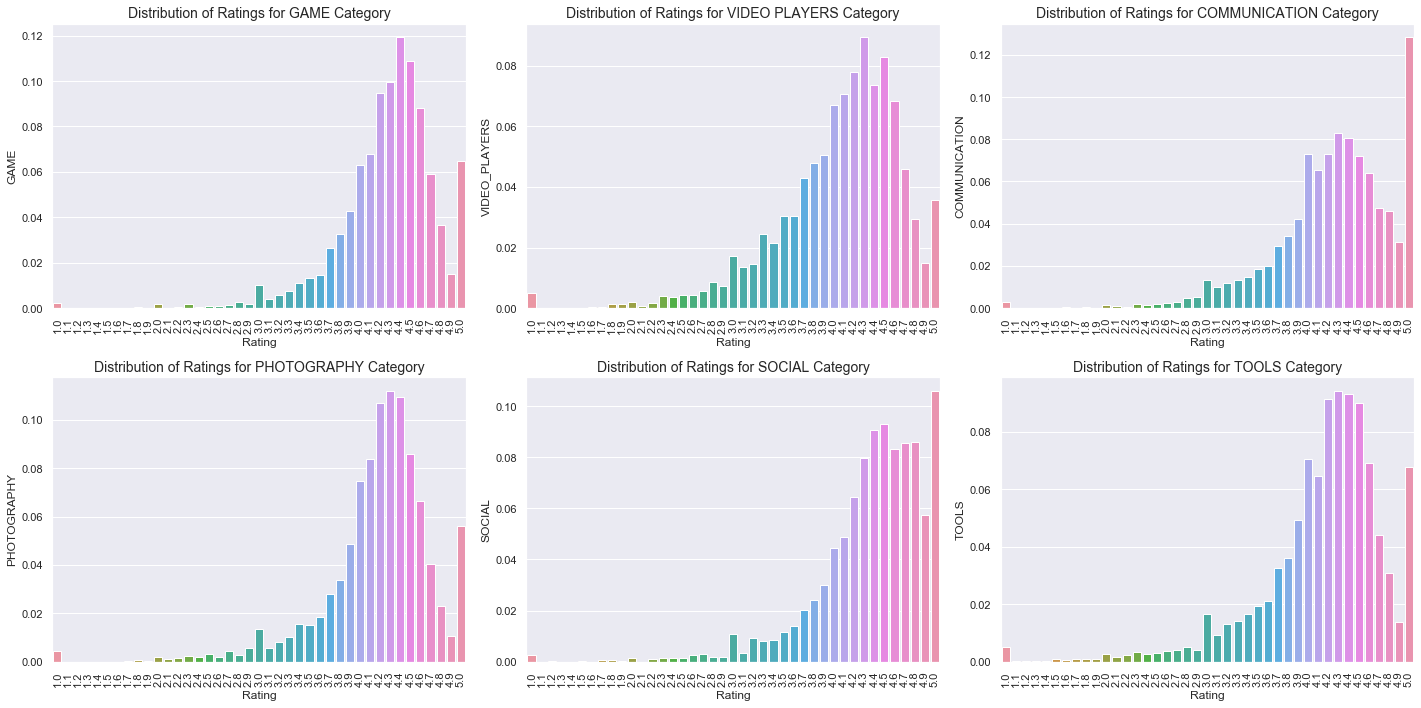

In [100]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# GAME Category
axs[0, 0].set_ylabel('Count of Ratings')
axs[0, 0].set_title('Distribution of Ratings for GAME Category', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.GAME, ax = axs[0,0])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# VIDEO PLAYERS Category
axs[0, 1].set_ylabel('Count of Ratings')
axs[0, 1].set_title(
    'Distribution of Ratings for VIDEO PLAYERS Category', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.VIDEO_PLAYERS, ax = axs[0,1])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# COMMUNICATION Category
axs[0, 2].set_ylabel('Count of Ratings')
axs[0, 2].set_title(
    'Distribution of Ratings for COMMUNICATION Category', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.COMMUNICATION, ax = axs[0,2])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# PHOTOGRAPHY Category
axs[1, 0].set_ylabel('Count of Ratings')
axs[1, 0].set_title(
    'Distribution of Ratings for PHOTOGRAPHY Category', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.PHOTOGRAPHY, ax = axs[1,0])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# SOCIAL Category
axs[1, 1].set_ylabel('Count of Ratings')
axs[1, 1].set_title('Distribution of Ratings for SOCIAL Category', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.SOCIAL, ax = axs[1,1])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# TOOLS Category
axs[1, 2].set_ylabel('Count of Ratings')
axs[1, 2].set_title('Distribution of Ratings for TOOLS Category', fontsize=14)
plot = sns.barplot(x = total_df.Rating, y = total_df.TOOLS, ax = axs[1,2])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

plt.tight_layout()
# plt.savefig('../graphs/Distribution_of_Ratings_Over_Top_Categories.png', dpi = 500, bbox_inches = 'tight');